# Exercise 0 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

# Exercise 1 : Read the Dataset

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exercise 2 : Drop Unnamed: 0 column

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [8]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [9]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
df = df[df['ca'] != '?']
df = df[df['thal'] != '?']

In [11]:
df['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [12]:
df['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

# Exercise 4 : Handle missing data

In [13]:
df.isna().sum()       # no missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [14]:
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  present   297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

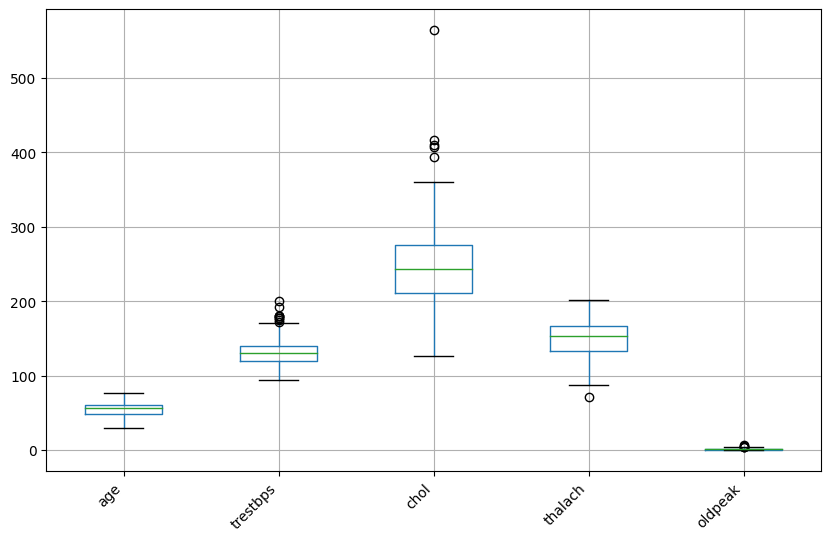

In [16]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['age','trestbps','chol','thalach','oldpeak'])
plt.xticks(rotation=45, ha="right")
plt.show()

In [28]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['age'].between(lower_limit, upper_limit)]

In [29]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['trestbps'].between(lower_limit, upper_limit)]

In [30]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['chol'].between(lower_limit, upper_limit)]

In [31]:
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['thalach'].between(lower_limit, upper_limit)]

In [32]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['oldpeak'].between(lower_limit, upper_limit)]

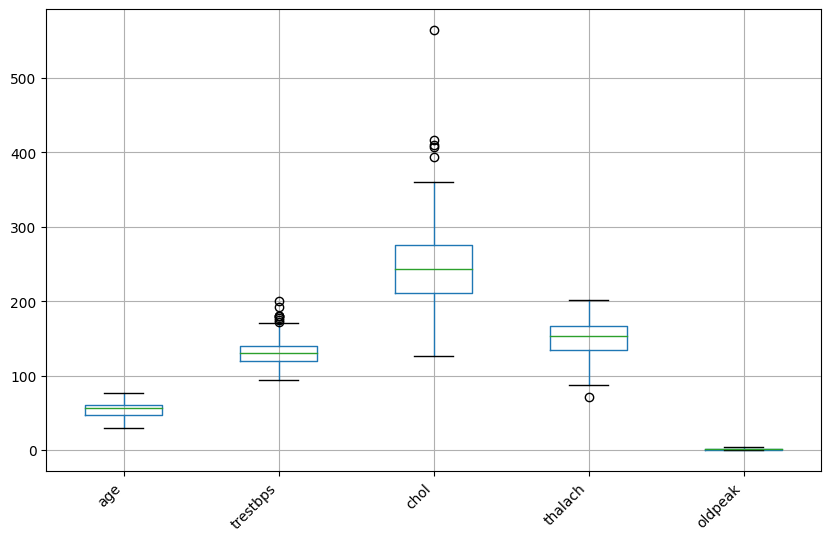

In [33]:
plt.figure(figsize=(10, 6))
new_df.boxplot(column=['age','trestbps','chol','thalach','oldpeak'])
plt.xticks(rotation=45, ha="right")
plt.show()

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [34]:
corr = new_df.corr().abs()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,0.090442,0.113409,0.289391,0.208523,0.134453,0.145570,0.398292,0.103305,0.200513,0.152608,0.369777,0.123309,0.228022
sex,0.090442,1.000000,0.012515,0.066223,0.214600,0.041044,0.041696,0.054033,0.138979,0.111811,0.028133,0.099733,0.386099,0.282851
cp,0.113409,0.012515,1.000000,0.022577,0.076750,0.056753,0.076003,0.337652,0.376572,0.206499,0.153770,0.220683,0.271437,0.398352
trestbps,0.289391,0.066223,0.022577,1.000000,0.144339,0.190489,0.141673,0.044084,0.071637,0.161669,0.096905,0.101464,0.123331,0.160317
chol,0.208523,0.214600,0.076750,0.144339,1.000000,0.013686,0.173238,0.001753,0.059035,0.049662,0.008805,0.114387,0.011114,0.082687
fbs,0.134453,0.041044,0.056753,0.190489,0.013686,1.000000,0.069431,0.013193,0.000212,0.035428,0.063905,0.166342,0.070563,0.008041
restecg,0.145570,0.041696,0.076003,0.141673,0.173238,0.069431,1.000000,0.081876,0.097910,0.125620,0.135359,0.134348,0.019057,0.175955
thalach,0.398292,0.054033,0.337652,0.044084,0.001753,0.013193,0.081876,1.000000,0.378774,0.343004,0.384037,0.268864,0.265427,0.418689
exang,0.103305,0.138979,0.376572,0.071637,0.059035,0.000212,0.097910,0.378774,1.000000,0.316215,0.264387,0.156285,0.329007,0.421688
oldpeak,0.200513,0.111811,0.206499,0.161669,0.049662,0.035428,0.125620,0.343004,0.316215,1.000000,0.539029,0.260949,0.319573,0.429541


<Axes: >

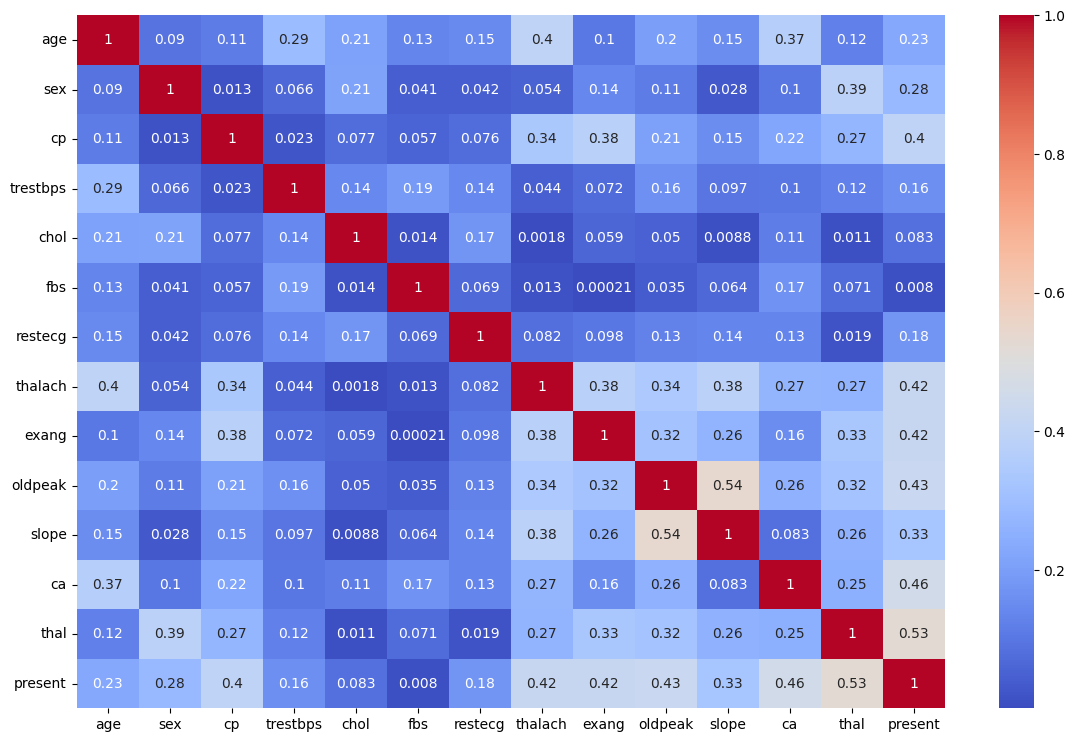

In [35]:
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [38]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop
#new_df.drop(to_drop, axis=1, inplace=True)

[]

# Exercise 8 : X and Y split, then train and test split

In [39]:
X = new_df.drop('present', axis=1)
Y = new_df['present']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("x train is : ",X_train.shape)
print("x test is : ",X_test.shape)
print("y train is : ",Y_train.shape)
print("y test is : ",Y_test.shape)

x train is :  (233, 13)
x test is :  (59, 13)
y train is :  (233,)
y test is :  (59,)


# Exercise 9 : Train the model

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\dalal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
logreg.predict(X_train).shape

(233,)

In [42]:
logreg.predict_proba(X_train)

array([[0.83666328, 0.16333672],
       [0.068875  , 0.931125  ],
       [0.71844753, 0.28155247],
       [0.14786117, 0.85213883],
       [0.94787811, 0.05212189],
       [0.08289258, 0.91710742],
       [0.71835584, 0.28164416],
       [0.00441526, 0.99558474],
       [0.94431258, 0.05568742],
       [0.96341405, 0.03658595],
       [0.19714091, 0.80285909],
       [0.95336303, 0.04663697],
       [0.69067231, 0.30932769],
       [0.87330581, 0.12669419],
       [0.05229953, 0.94770047],
       [0.98750611, 0.01249389],
       [0.02782614, 0.97217386],
       [0.73892764, 0.26107236],
       [0.03918993, 0.96081007],
       [0.25959391, 0.74040609],
       [0.00250531, 0.99749469],
       [0.50249185, 0.49750815],
       [0.98553264, 0.01446736],
       [0.98374267, 0.01625733],
       [0.95035767, 0.04964233],
       [0.11362938, 0.88637062],
       [0.71748436, 0.28251564],
       [0.00743406, 0.99256594],
       [0.90013906, 0.09986094],
       [0.24494557, 0.75505443],
       [0.

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [43]:
train_score = logreg.score(X_train, Y_train)
train_score

0.8669527896995708

In [44]:
Y_pred = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

sens_spec = sensitivity / specificity

auc_roc = roc_auc_score(Y_test, Y_pred)

In [45]:
print("the accuracy is : ",accuracy)
print("the sensitivity is : ",sensitivity)
print("the specificity is : ",specificity)
print("the Sensitivity/Specificity is : ",sens_spec)
print("the AUC-ROC is : ",auc_roc)

the accuracy is :  0.7966101694915254
the sensitivity is :  0.7586206896551724
the specificity is :  0.8333333333333334
the Sensitivity/Specificity is :  0.9103448275862068
the AUC-ROC is :  0.7959770114942528


# Exercise 11 : Find the wights and y intercept

In [46]:
weights = logreg.coef_
y_intercept = logreg.intercept_
print("the weights is : " ,weights)
print("the y intercept is : " ,y_intercept)

the weights is :  [[-0.05192287  0.75599367  0.23126672  0.01431303  0.00538017 -0.39757991
   0.16608655 -0.03738961  0.445416    0.35038147  0.06626356  1.56806736
   0.45971398]]
the y intercept is :  [-0.05883873]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

In [ ]:
optional

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

In [47]:
lambdas = [0.1, 1, 10]
lasso_models = []
for l in lambdas:
    lasso = Lasso(alpha=l)
    lasso.fit(X_train, Y_train)
    lasso_models.append(lasso)

ridge_models = []
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train, Y_train)
    ridge_models.append(ridge)

elastic_models = []
for l in lambdas:
    elastic = ElasticNet(alpha=l)
    elastic.fit(X_train, Y_train)
    elastic_models.append(elastic)

for i, model in enumerate(lasso_models + ridge_models + elastic_models):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred.round())
    recall = recall_score(Y_test, Y_pred.round())
    precision = precision_score(Y_test, Y_pred.round())
    f1 = f1_score(Y_test, Y_pred.round())
    auc_roc = roc_auc_score(Y_test, Y_pred)
    print(f"Model {i+1}: Regularization: {model.__class__.__name__}, Lambda: {lambdas[i%3]}, \nAccuracy: {accuracy:.2f}, \nRecall: {recall:.2f}, \nPrecision: {precision:.2f}, \nF1 Score: {f1:.2f}, \nAUC-ROC: {auc_roc:.2f}")


Model 1: Regularization: Lasso, Lambda: 0.1, 
Accuracy: 0.75, 
Recall: 0.62, 
Precision: 0.82, 
F1 Score: 0.71, 
AUC-ROC: 0.80
Model 2: Regularization: Lasso, Lambda: 1, 
Accuracy: 0.61, 
Recall: 0.45, 
Precision: 0.65, 
F1 Score: 0.53, 
AUC-ROC: 0.66
Model 3: Regularization: Lasso, Lambda: 10, 
Accuracy: 0.51, 
Recall: 0.00, 
Precision: 0.00, 
F1 Score: 0.00, 
AUC-ROC: 0.50
Model 4: Regularization: Ridge, Lambda: 0.1, 
Accuracy: 0.81, 
Recall: 0.69, 
Precision: 0.91, 
F1 Score: 0.78, 
AUC-ROC: 0.87
Model 5: Regularization: Ridge, Lambda: 1, 
Accuracy: 0.81, 
Recall: 0.69, 
Precision: 0.91, 
F1 Score: 0.78, 
AUC-ROC: 0.87
Model 6: Regularization: Ridge, Lambda: 10, 
Accuracy: 0.81, 
Recall: 0.69, 
Precision: 0.91, 
F1 Score: 0.78, 
AUC-ROC: 0.88
Model 7: Regularization: ElasticNet, Lambda: 0.1, 
Accuracy: 0.78, 
Recall: 0.66, 
Precision: 0.86, 
F1 Score: 0.75, 
AUC-ROC: 0.82
Model 8: Regularization: ElasticNet, Lambda: 1, 
Accuracy: 0.63, 
Recall: 0.48, 
Precision: 0.67, 
F1 Score: 0.5

C:\Users\dalal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dalal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
